In [2]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt

# Cellular Automata Chain

## Estado Inicial randomico

O Estado Inicial constroem o vetor no tempo zero. A variável 'Tamanho' nos dá o $len(Estado Inicial)$, contendo 1 e 0. A variável 'vizinhos' nos dá a relação de interação, se temos apenas primeiros vizinhos($vizinhos = 2$) esse fator influência no radom. Para ($vizinhos = 2$), $8$ bit, o random vai de $0$ a $255$ que são todas as possíbilidades escritas até $8$ bit. Se ($vizinhos = 4$) temos $32$ bit o que nos dá $2^{32}=4.294.967.296$ possibilidade de número.

In [3]:
def Estado_Inicial(tamanho, vizinhos):
    if vizinhos % 2 == 1: vizinhos = 2 #O número de vizinhos tem que ser par/ =2 que é o caso pedido e mais simples
    if tamanho < 2**(vizinhos + 1): #condição de tamanho do vetor ser compatível com os bit, já que a composição da regra tem essa relação.
        tamanho = 2**(vizinhos + 1) # Para vizinhos = 2 tamanho_min = 8. Para vizinhos = 4, tamanho_min = 32 
    numero = random.randint(0,2**(2**(vizinhos + 1))-1) 
    EI = [int(x) for x in np.binary_repr(numero, width=tamanho)]
    return EI

Estado_Inicial(1, 2)

[1, 0, 1, 1, 0, 0, 1, 0]

A Regra de Evolução constroem uma matriz que leva em conta as interações. Se temos $vizinhos = 2$ a matriz terá três colunas que representará: vizinho da esquerda, o meio e o vizinho da direita. O número de linhas é dado para quantos bit estamos trabalhando. Se $vizinho =2$ teremos oito linhas($rows = 2^{(vizinhos +1)} =2^3 = 8$).

OBS: Só é permitido interações com vizinhos par

In [13]:
def Regra_Evolucao(vizinhos): #Gera a matrix que definirá a regra 
    if vizinhos % 2 == 1: vizinhos = 2 #Condição mínima
    matrix = np.zeros((2**(vizinhos + 1),vizinhos + 1))
    for i in range(2**(vizinhos + 1)):
        matrix[i] = [int(x) for x in np.binary_repr(2**(vizinhos + 1)-i-1, width=(vizinhos + 1)) ]
    return matrix
Regra_Evolucao(4)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 0., 1.],
       [1., 1., 1., 0., 0.],
       [1., 1., 0., 1., 1.],
       [1., 1., 0., 1., 0.],
       [1., 1., 0., 0., 1.],
       [1., 1., 0., 0., 0.],
       [1., 0., 1., 1., 1.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 0.],
       [0., 1., 1., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 1., 1.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

## Regra de interação

In [17]:
#vizinhos = 4 numero máximo é 4294967295
def CAChain(Tamanho_Estado_0, Time_step, Numero_Binario_Regra, vizinhos=2): 
        
    CP = 2**(vizinhos + 1) #Combinações Possívéis para regra de composição de vizinhoa
    
    #Rule é o valor da evolução para cada Regra de composção dos vizinhos#
    rule = [int(x) for x in np.binary_repr(Numero_Binario_Regra, width=CP)] #Ex: para 1 = [0,0,0,0,0,0,0,1]
    RE   = Regra_Evolucao(vizinhos) # Dá a matrix
    #---------------------------------------------#
    
    # VETOR do ESTADO INICIAL RANDOMICO#
    EI = np.array(Estado_Inicial(Tamanho_Estado_0,vizinhos))
    
    #CONDIÇÃO DE CONTORNO
    #EIp Cria um vetor do tamanho inicial mais os vizinhos
    #O Estado Inícial parcial(EIp) recebe os últimos e os primeiros termos do EI original(Condição de Contorno)
    EIp = np.zeros(Tamanho_Estado_0 + vizinhos) #Ex EI = [1,2,3,4,5,6,7,8]
    for i in range(int(vizinhos/2)):            #   EIp= [8,1,2,3,4,5,6,7,8,1] ára vizinhos =2   
        EIp[i] = EI[-int(vizinhos/2)+i]
        EIp[-int(vizinhos/2)+i] = EI[i]
    EIp[int(vizinhos/2):-int(vizinhos/2)] = EI
    #------------------------------------------------#
    
    EI_temporario = np.zeros(Tamanho_Estado_0) #Auxilia na interação
    # MAtrix que recebe os estados a cada interação
    matrix = np.zeros((Time_step+1,Tamanho_Estado_0 )) #Matrix que savará todos os Time_step
    matrix[0] = EI
    #-----------------------#
    #MUDAR AKI  
    for j in range(Time_step):  #Número de passos ou evolução no tempo
        for i in range(len(EI)): #Verifica cada elemento(0 até Tamanho_Estado_0) do estado "incial inicial" ou estado atual no tempo   
            for k in range(CP):   #Verifica a regra MR(0 até bit) para  
                if  all(EIp[i:vizinhos+1+i] == RE[k]): #CONSENRTAR ISSO
                    EI_temporario[ i ] = rule[k]
                    
        matrix[j+1] = EI_temporario               #O estado atual é adicionado a matriz
        EI = EI_temporario                        #O estado que esta na interação é o EI, logo reescrevo o estado temporário nele, já tendo o salvo na matriz
        EIp = np.zeros(Tamanho_Estado_0 + vizinhos)
        #CONDIÇÃO DE CONTORNO - igual a de cima
        for i in range(int(vizinhos/2)): 
            EIp[i] = EI[-int(vizinhos/2)+i]
            EIp[-int(vizinhos/2)+i] = EI[i]
        EIp[int(vizinhos/2):-int(vizinhos/2)] = EI
        
        EI_temporario = np.zeros(Tamanho_Estado_0) #Apago o estado temporário para ele salvar os valores na ultima interação

    return matrix

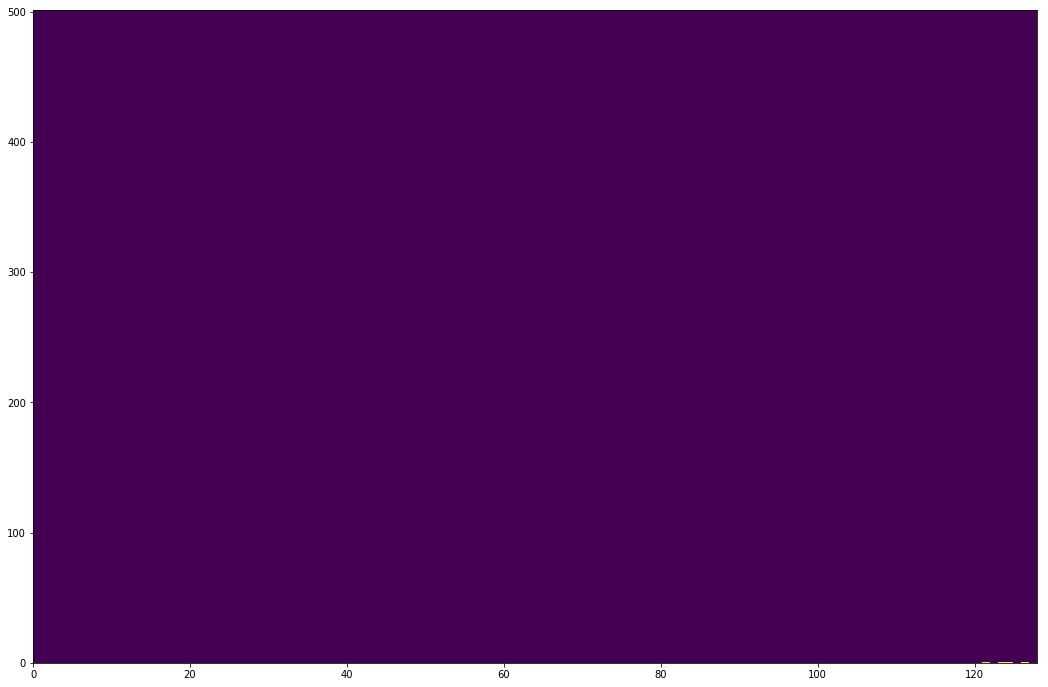

In [18]:
plt.figure(figsize=(18,12)) 
plt.pcolor(CAChain(128,500,0))
plt.show()

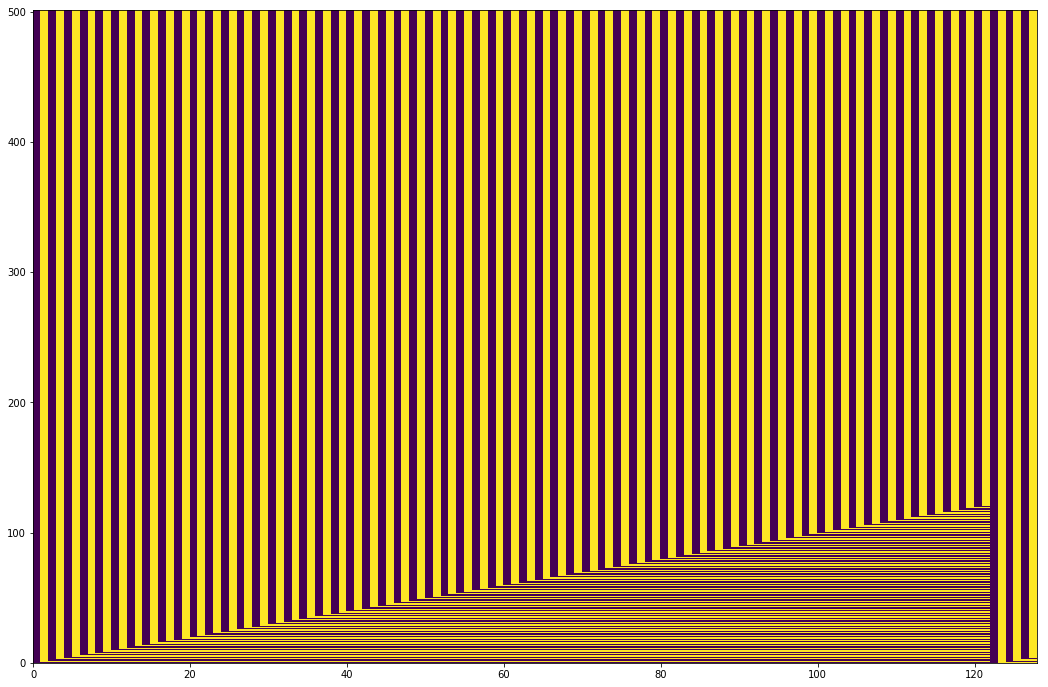

In [19]:
plt.figure(figsize=(18,12)) 
plt.pcolor(CAChain(128,500,13))
plt.show()

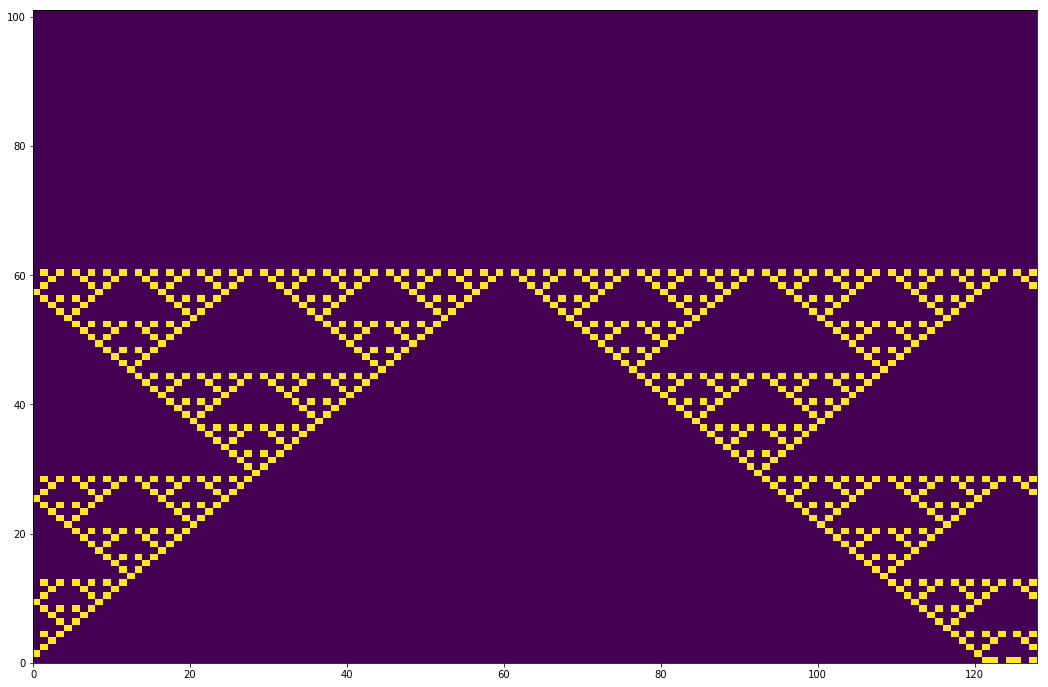

In [20]:
plt.figure(figsize=(18,12)) 
plt.pcolor(CAChain(128,100,18))
plt.show()

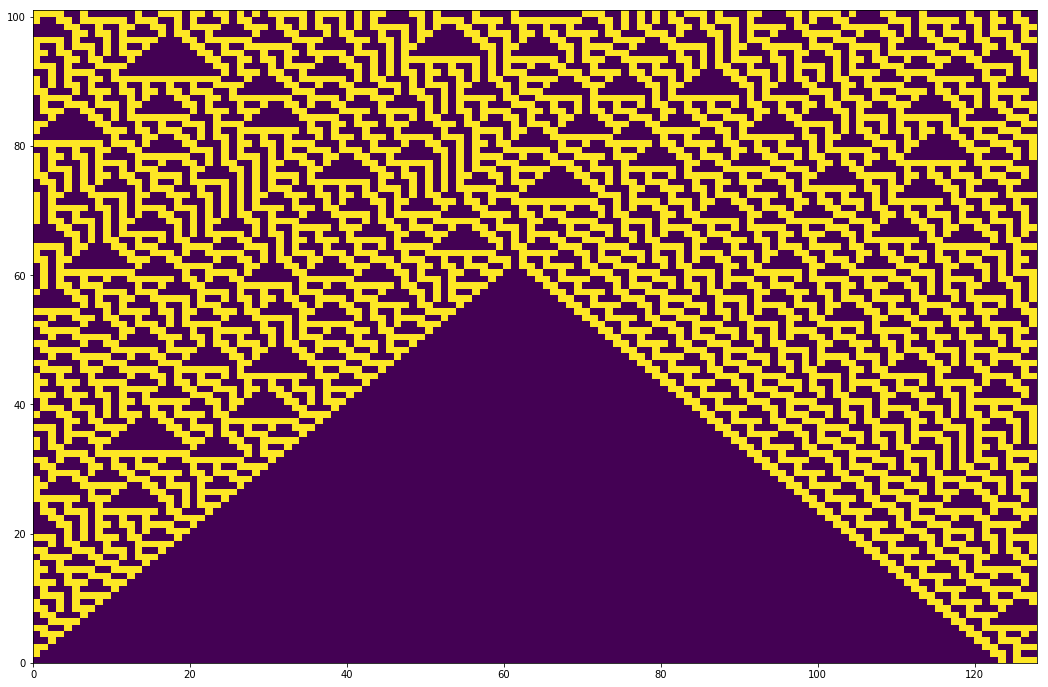

In [21]:
plt.figure(figsize=(18,12)) 
plt.pcolor(CAChain(128,100,30))
plt.show()

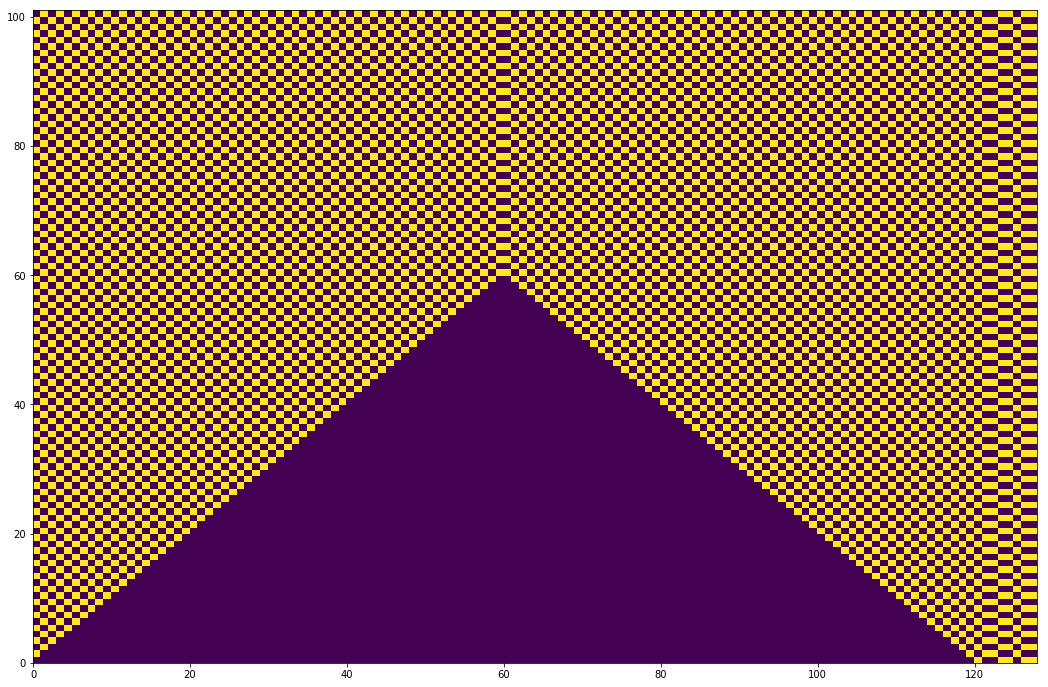

In [22]:
plt.figure(figsize=(18,12)) 
plt.pcolor(CAChain(128,100,50))
plt.show()

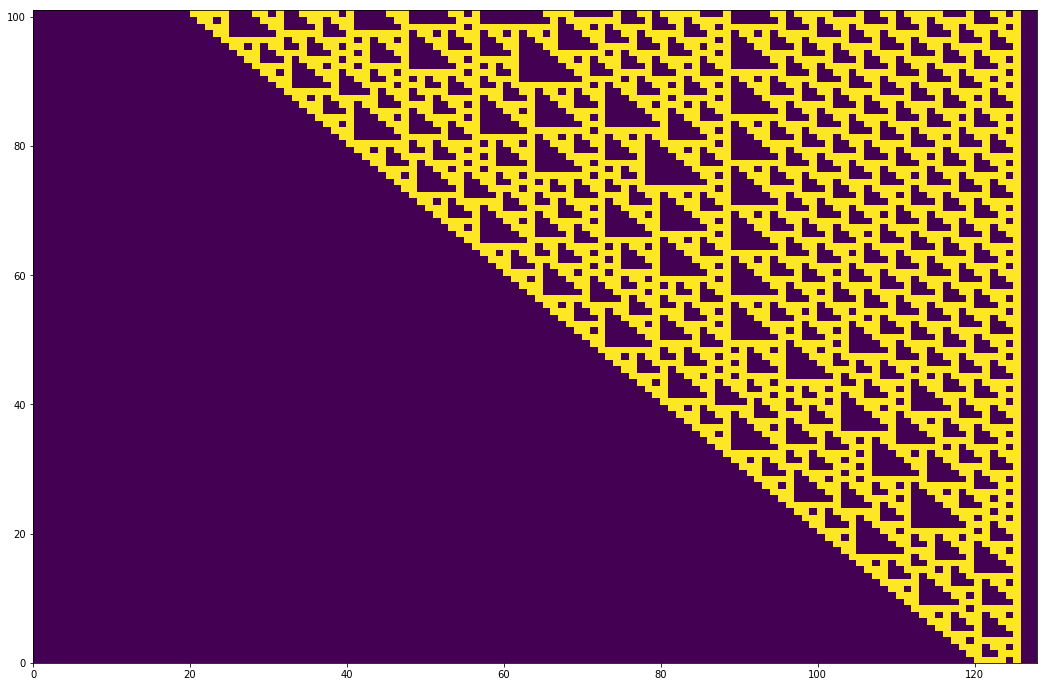

In [23]:
plt.figure(figsize=(18,12)) 
plt.pcolor(CAChain(128,100,110))
plt.show()

# Condição de olhar os dois primeiros vizinhos

Gera uma matriz de 32 x 5 podendo ser escrito $2^32$ numeros!

OBS: Tem que encontrar os números que geram algo interessante!

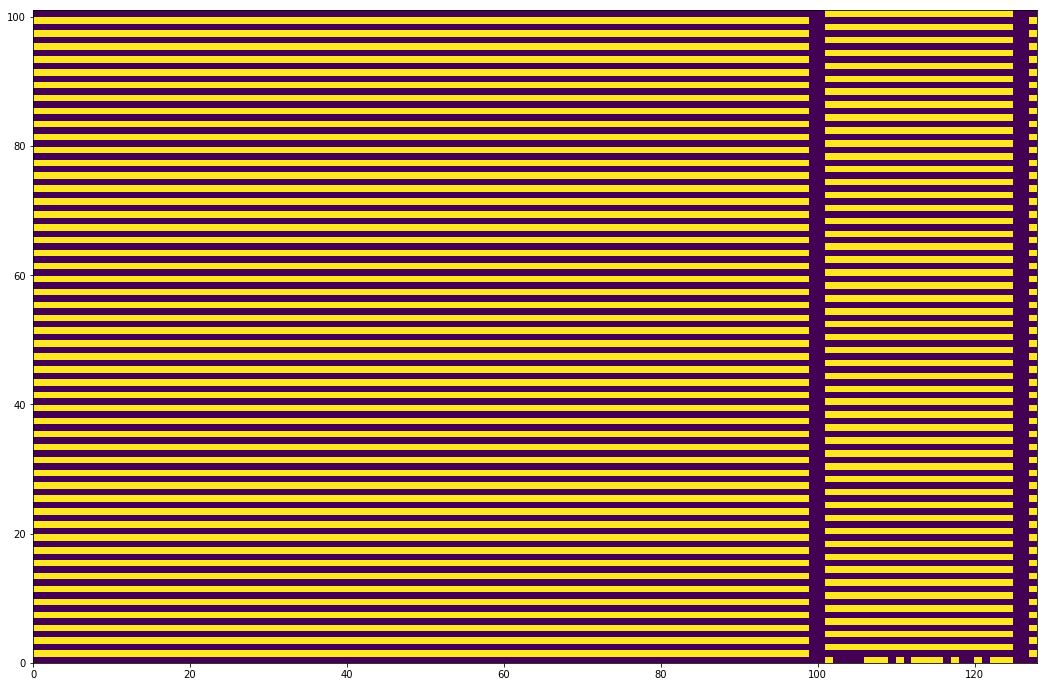

In [24]:
plt.figure(figsize=(18,12)) 
plt.pcolor(CAChain(128,100,int(1e0),4))
plt.show()

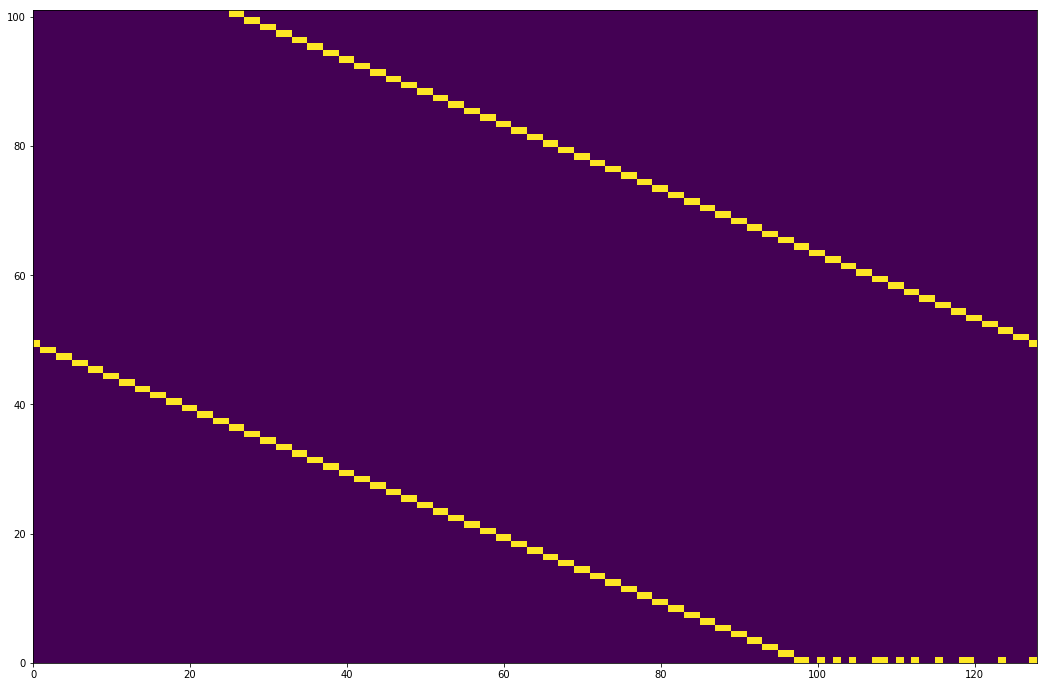

In [25]:
plt.figure(figsize=(18,12)) 
plt.pcolor(CAChain(128,100,int(1e1),4))
plt.show()


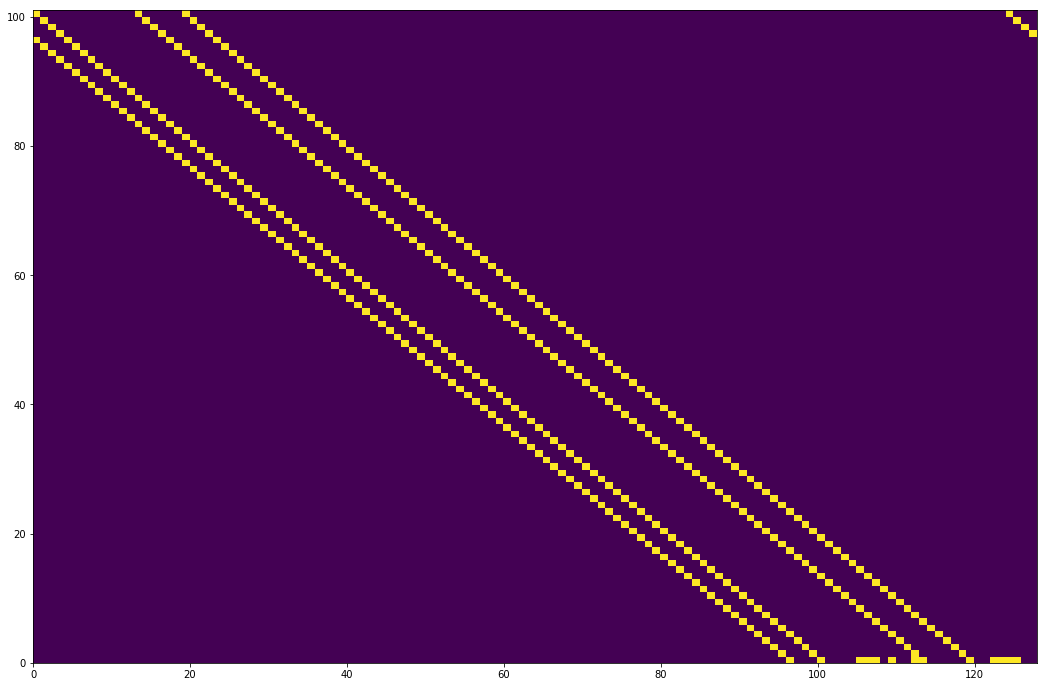

In [26]:
#CAChain(Tamanho_Estado_0, Time_step, Numero_Binario_Regra, vizinhos=2)
plt.figure(figsize=(18,12)) 
plt.pcolor(CAChain(128,100,int(1e2),4))
plt.show()

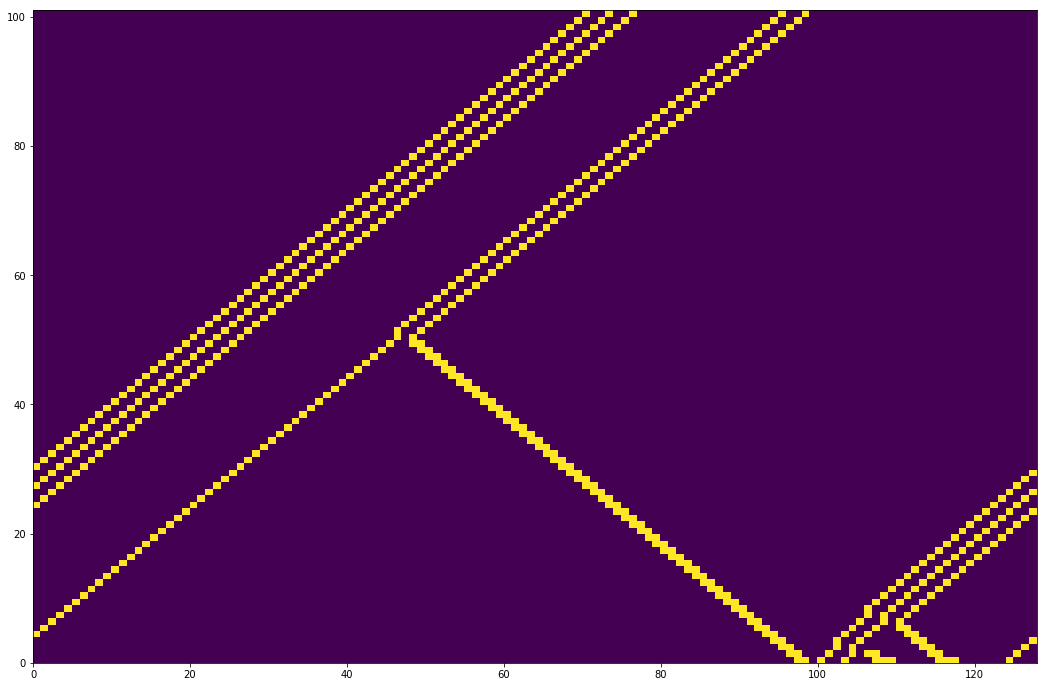

In [27]:
plt.figure(figsize=(18,12)) 
plt.pcolor(CAChain(128,100,int(1e3),4))
plt.show()

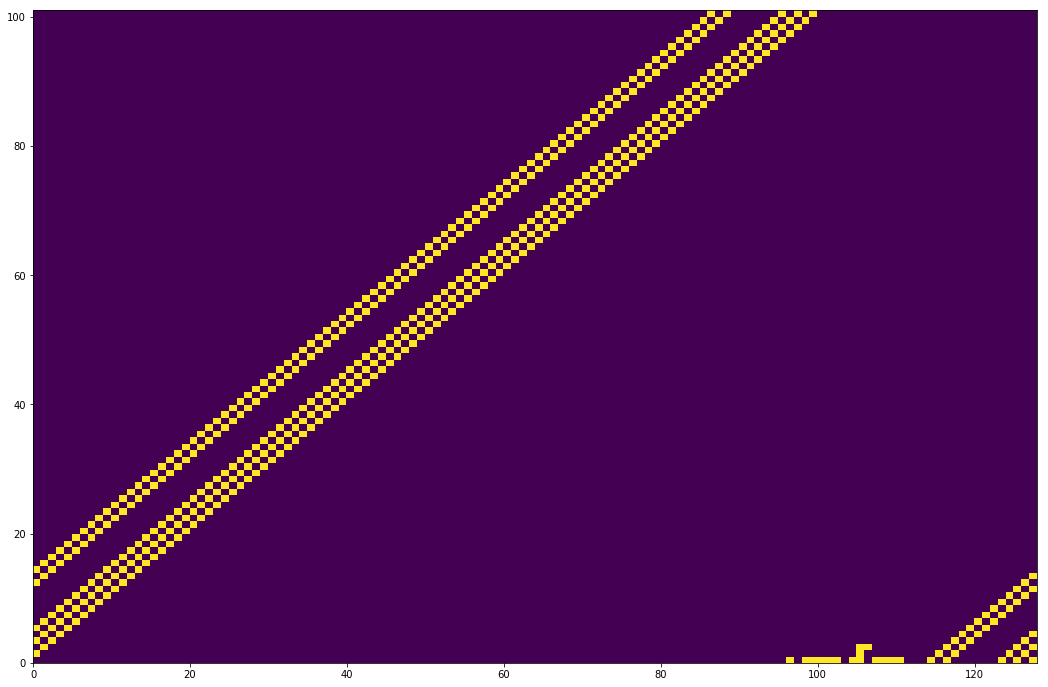

In [28]:
plt.figure(figsize=(18,12)) 
plt.pcolor(CAChain(128,100,int(1e4),4))
plt.show()

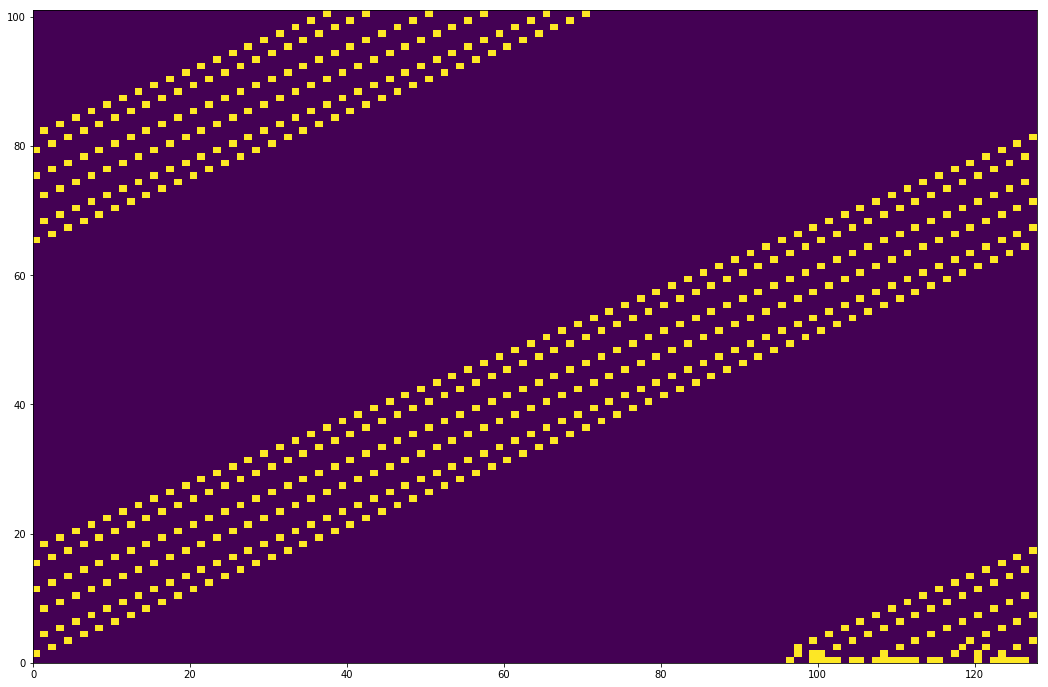

In [29]:
plt.figure(figsize=(18,12)) 
plt.pcolor(CAChain(128,100,int(1e5),4))
plt.show()

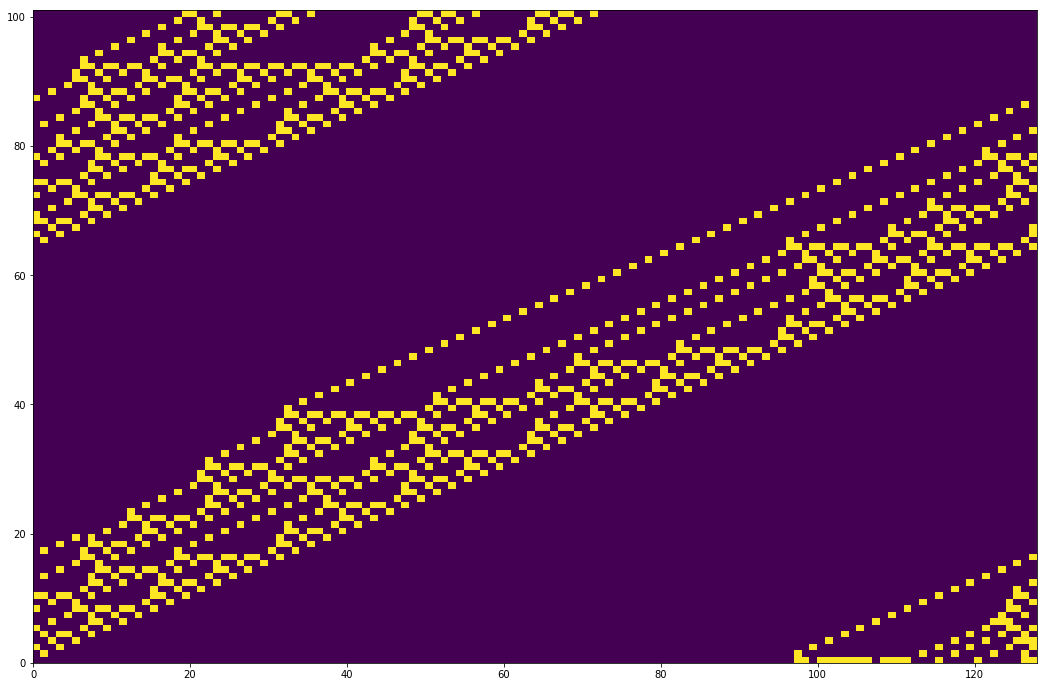

In [32]:
plt.figure(figsize=(18,12)) 
plt.pcolor(CAChain(128,100,int(1e6),4))
plt.show()

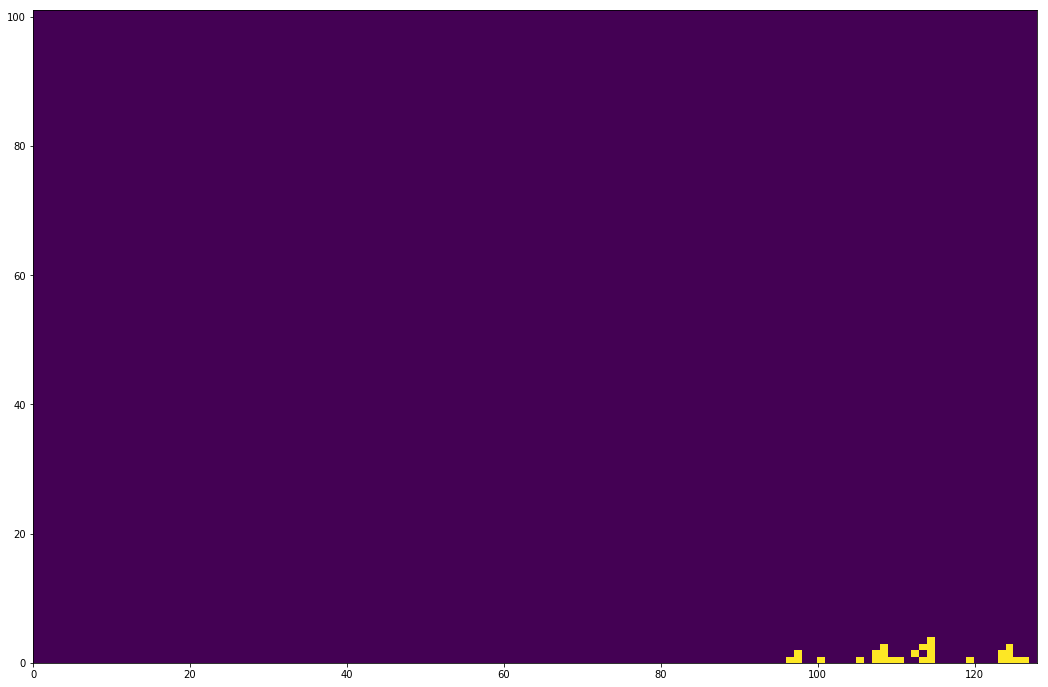

In [33]:
plt.figure(figsize=(18,12)) 
plt.pcolor(CAChain(128,100,int(1e7),4))
plt.show()

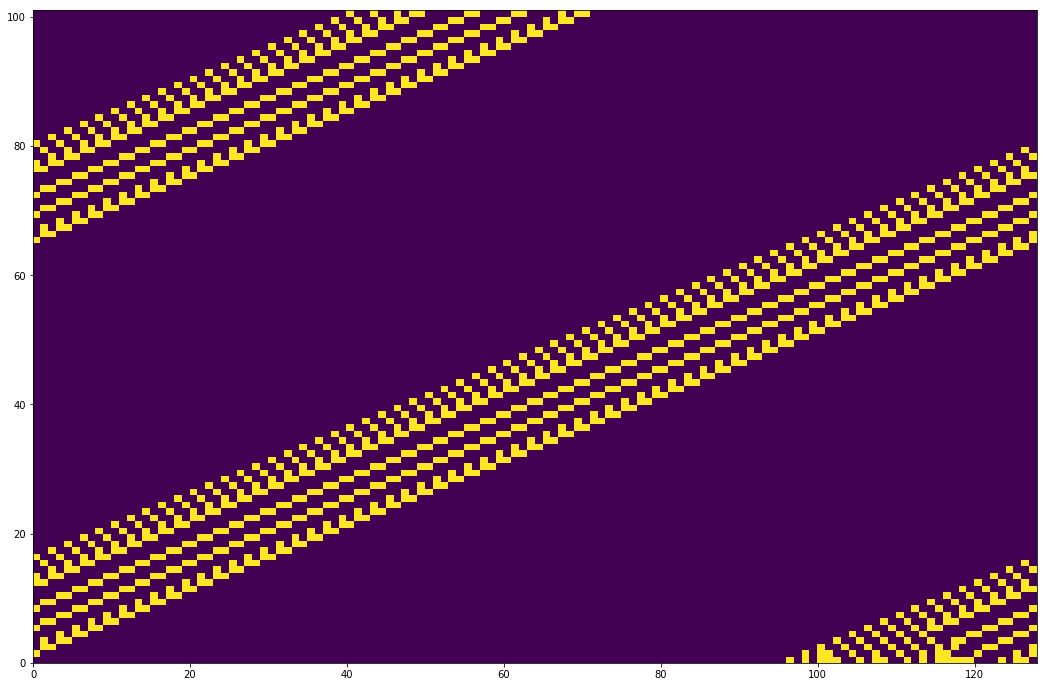

In [34]:
plt.figure(figsize=(18,12)) 
plt.pcolor(CAChain(128,100,int(1e8),4))
plt.show()

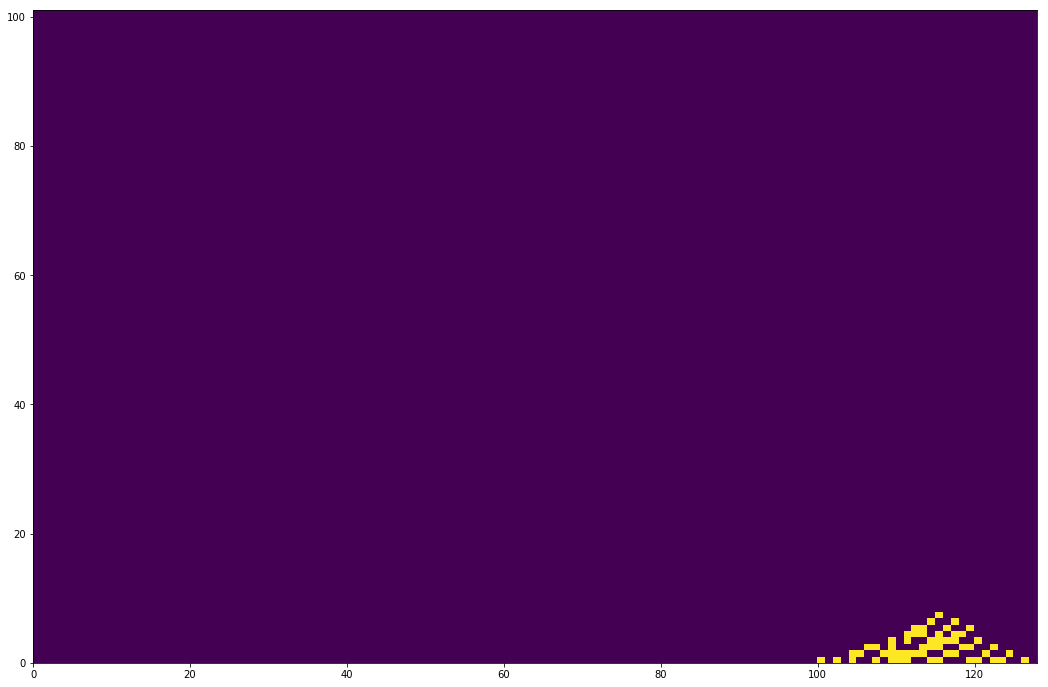

In [37]:
plt.figure(figsize=(18,12)) 
plt.pcolor(CAChain(128,100,int(1e9),4))
plt.show()

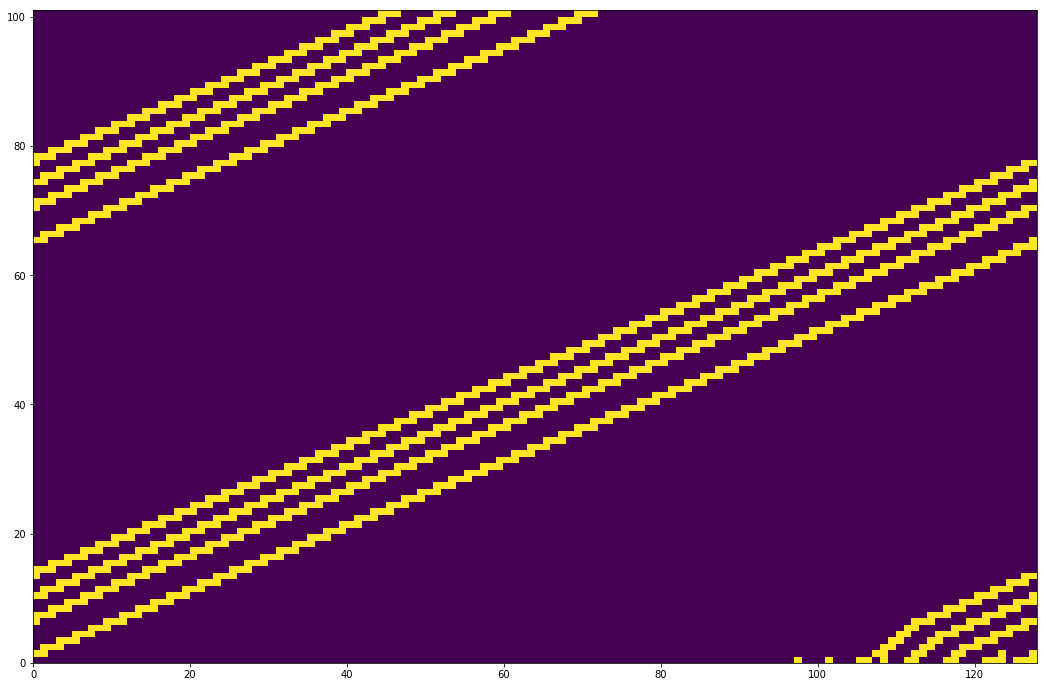

In [38]:
plt.figure(figsize=(18,12)) 
plt.pcolor(CAChain(128,100,int(2e9),4))
plt.show()

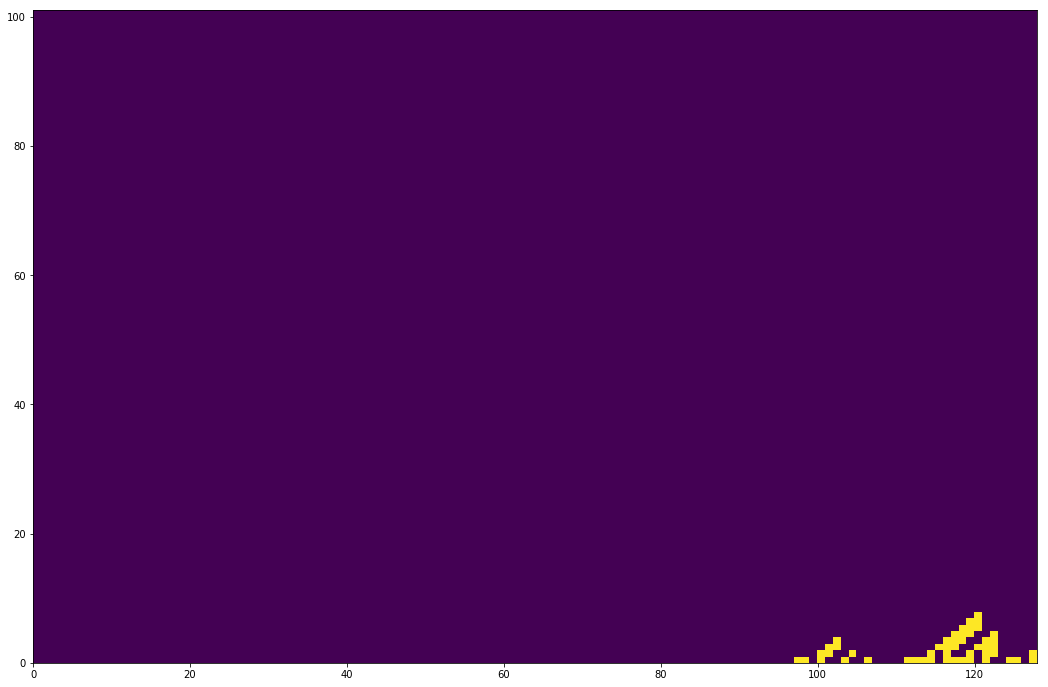

In [39]:
plt.figure(figsize=(18,12)) 
plt.pcolor(CAChain(128,100,int(3e9),4))
plt.show()

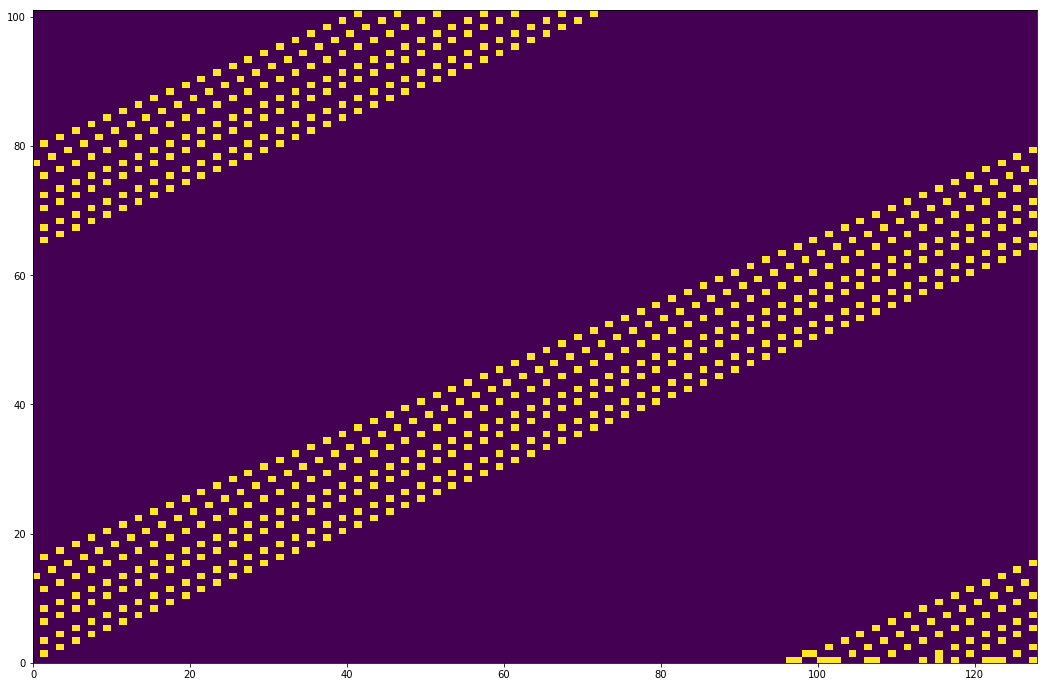

In [40]:
plt.figure(figsize=(18,12)) 
plt.pcolor(CAChain(128,100,int(4e9),4))
plt.show()

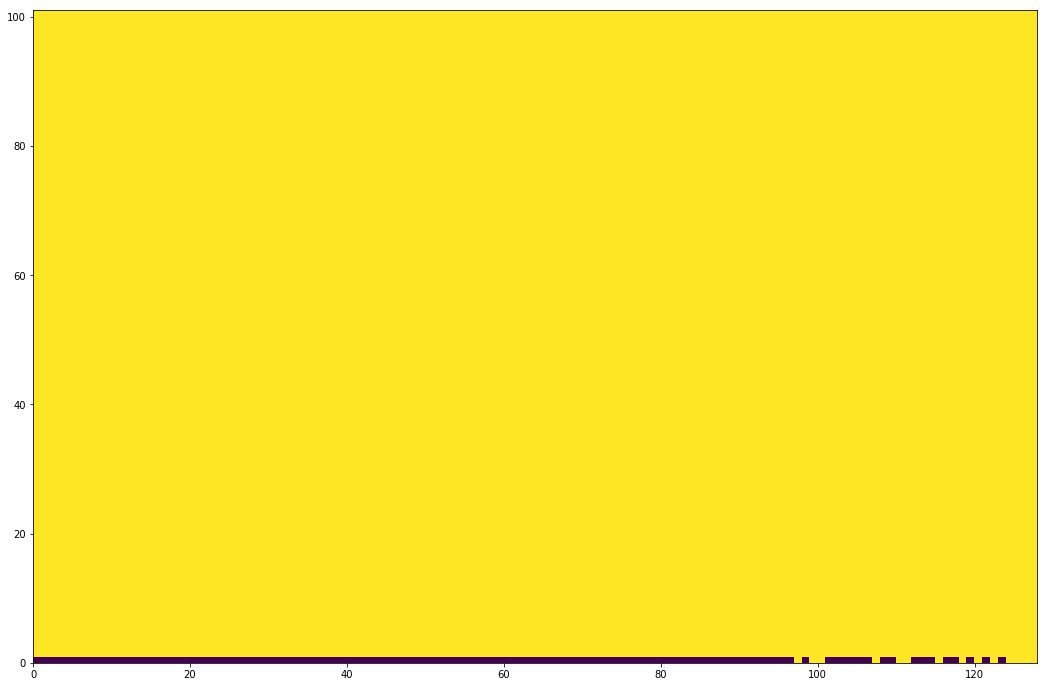

In [41]:
plt.figure(figsize=(18,12)) 
plt.pcolor(CAChain(128,100,2**32-1,4))
plt.show()

1